In [1]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 16.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 77.7 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.4-cp310-cp310-linux_x86_64.whl size=3327207 sha256=ff0ce13107eaadbe665728874567b703979f7a6f9d3c9a51671d18ad5157a60e
  Stored in directory: /root/.cache/pip/wheels/08/5e/55/a7db8d57920eb2c2aa41c36dc4c6d3cd12323865de191a7211
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566165 sha256=97b0878db561490133557ee419fa816db91d5806a65a5cf0b7a9319cb1e1a139
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built dlib face-recognition-models


In [2]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/*.mp4')
video_fil += glob.glob('/kaggle/input/deepfake-face-only/Celeb_real_face_only/Celeb_real_face_only/*.mp4')
video_fil += glob.glob('/kaggle/input/deepfake-face-only/DFDC_FAKE_Face_only_data/DFDC_FAKE_Face_only_data/*.mp4')
video_fil += glob.glob('/kaggle/input/deepfake-face-only/DFDC_REAL_Face_only_data/DFDC_REAL_Face_only_data/*.mp4')
video_fil += glob.glob('/kaggle/input/deepfake-face-only/FF_Face_only_data/FF_Face_only_data/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 6450
['/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id52_id49_0008.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id39_id42_0007.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id59_id61_0007.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id21_id26_0009.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id61_id60_0005.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id56_id49_0006.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id11_id7_0001.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id30_id32_0004.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id29_id31_0003.mp4', '/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/id2_id37_0007.mp4', '/kag

In [3]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/kaggle/input/deepfake-face-only/Celeb_fake_face_only/Celeb_fake_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake-face-only/Celeb_real_face_only/Celeb_real_face_only/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake-face-only/DFDC_FAKE_Face_only_data/DFDC_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake-face-only/DFDC_REAL_Face_only_data/DFDC_REAL_Face_only_data/*.mp4')
video_files += glob.glob('/kaggle/input/deepfake-face-only/FF_Face_only_data/FF_Face_only_data/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 127, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 137, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 118, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 134, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [4]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
import pandas as pd

class video_dataset(Dataset):
    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length

    def __len__(self):
        return len(self.video_names)

    def __getitem__(self, idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100 / self.count)
        first_frame = np.random.randint(0, a)
        temp_video = video_path.split('/')[-1]
        label = self.labels.iloc[(self.labels.loc[self.labels["file"] == temp_video].index.values[0]), 1]
        if label == 'FAKE':
            label = 0
        if label == 'REAL':
            label = 1
        for i, frame in enumerate(self.frame_extract(video_path)):
            frames.append(self.transform(frame))
            if len(frames) == self.count:
                break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames, label

    def frame_extract(self, path):
        vidObj = cv2.VideoCapture(path)
        success = 1
        while success:
            success, image = vidObj.read()
            if success:
                yield image

# Plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1, 2, 0)
    b, g, r = cv2.split(image)
    image = cv2.merge((r, g, b))
    image = image * [0.22803, 0.22145, 0.216989] + [0.43216, 0.394666, 0.37645]
    image = image * 255.0
    plt.imshow(image.astype(int))
    plt.show()

In [5]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list, labels):
    fake = 0
    real = 0
    for i in data_list:
        temp_video = i.split('/')[-1]
        label = labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]), 1]
        if label == 'FAKE':
            fake += 1
        if label == 'REAL':
            real += 1
    return real, fake

train :  5141
test :  1286
TRAIN:  Real: 2631  Fake: 2510
TEST:  Real: 670  Fake: 616


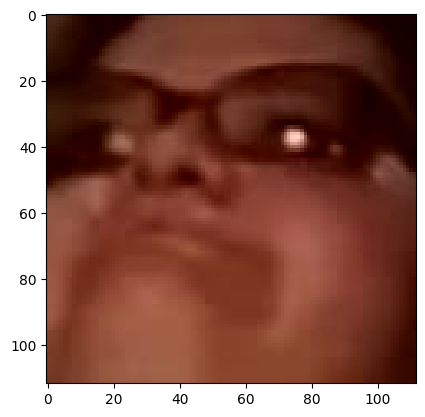

In [6]:
# load the labels and video in data loader
import random
from sklearn.model_selection import train_test_split

header_list = ["file", "label"]
labels = pd.read_csv('/kaggle/input/labels/Gobal_metadata.csv', names=header_list)

train_videos = video_files[:int(0.8 * len(video_files))]
valid_videos = video_files[int(0.8 * len(video_files)):]

print("train : ", len(train_videos))
print("test : ", len(valid_videos))

print("TRAIN: ", "Real:", number_of_real_and_fake_videos(train_videos, labels)[0], " Fake:", number_of_real_and_fake_videos(train_videos, labels)[1])
print("TEST: ", "Real:", number_of_real_and_fake_videos(valid_videos, labels)[0], " Fake:", number_of_real_and_fake_videos(valid_videos, labels)[1])

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

train_data = video_dataset(train_videos, labels, sequence_length=60, transform=train_transforms)
val_data = video_dataset(valid_videos, labels, sequence_length=60, transform=train_transforms)
train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
valid_loader = DataLoader(val_data, batch_size=4, shuffle=True, num_workers=4)
image, label = train_data[0]
im_plot(image[0, :, :, :])

In [18]:
#Model with feature visualization
from torch import nn
from torchvision import models
class ResNeXtGRUModel(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, gru_layers=1, hidden_dim=2048, bidirectional=True):
        super(ResNeXtGRUModel, self).__init__()
        self.cnn = models.resnext50_32x4d(weights='IMAGENET1K_V1')
        self.cnn = nn.Sequential(*list(self.cnn.children())[:-2])
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.gru = nn.GRU(latent_dim, hidden_dim, gru_layers, bidirectional=bidirectional, batch_first=True)
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        with torch.no_grad():
            x = self.cnn(x)
        x = self.avgpool(x)
        x = x.view(batch_size, seq_length, -1)
        gru_out, _ = self.gru(x)
        x = self.dropout(gru_out[:, -1, :])
        x = self.fc(x)
        return x
class ResNeXtGRUModel(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, gru_layers=1, hidden_dim=2048, bidirectional=True):
        super(ResNeXtGRUModel, self).__init__()
        self.cnn = models.resnext50_32x4d(weights='IMAGENET1K_V1')
        self.cnn = nn.Sequential(*list(self.cnn.children())[:-2])
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.gru = nn.GRU(latent_dim, hidden_dim, gru_layers, bidirectional=bidirectional, batch_first=True)
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        with torch.no_grad():
            x = self.cnn(x)
        x = self.avgpool(x)
        x = x.view(batch_size, seq_length, -1)
        gru_out, _ = self.gru(x)
        x = self.dropout(gru_out[:, -1, :])
        x = self.fc(x)
        return x



In [19]:
model = ResNeXtGRUModel(num_classes=2).cuda()

# Test the model
a = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))
print(a.shape)

torch.Size([1, 2])


In [20]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sn
import pandas as pd

class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.cuda()
            inputs = inputs.cuda()
        outputs = model(inputs)  # Only one value returned
        loss = criterion(outputs, targets)
        acc = calculate_accuracy(outputs, targets)
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
            "\r[Epoch %d/%d] [Batch %d/%d] [Loss: %f, Acc: %.2f%%]"
            % (epoch, num_epochs, i, len(data_loader), losses.avg, accuracies.avg))
    return losses.avg, accuracies.avg

def validate_epoch(epoch, num_epochs, data_loader, model, criterion):
    print('Validating')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    true_labels = []
    pred_labels = []
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda()
                inputs = inputs.cuda()
            outputs = model(inputs)  # Only one value returned
            loss = criterion(outputs, targets)
            acc = calculate_accuracy(outputs, targets)
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                "\r[Batch %d/%d] [Loss: %f, Acc: %.2f%%]"
                % (i, len(data_loader), losses.avg, accuracies.avg))
            true_labels.extend(targets.cpu().numpy())
            pred_labels.extend(outputs.argmax(dim=1).cpu().numpy())
    return losses.avg, accuracies.avg, true_labels, pred_labels

def train_and_evaluate(num_epochs, train_loader, valid_loader, model, criterion, optimizer):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    early_stopping = EarlyStopping(patience=7, verbose=True)

    for epoch in range(1, num_epochs + 1):
        train_loss, train_acc = train_epoch(epoch, num_epochs, train_loader, model, criterion, optimizer)
        val_loss, val_acc, true_labels, pred_labels = validate_epoch(epoch, num_epochs, valid_loader, model, criterion)

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping")
            break

    return train_losses, val_losses, train_accuracies, val_accuracies, true_labels, pred_labels


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [21]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [22]:
def plot_loss(train_loss_avg, test_loss_avg, num_epochs):
    loss_train = train_loss_avg
    loss_val = test_loss_avg
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='Validation loss')
    plt.ylim(0.1, 1)  # Adjust the y-axis scale
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sn
import pandas as pd

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5
# Number of epochs
num_epochs = 1

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss().cuda()

train_losses, val_losses, train_accuracies, val_accuracies, true_labels, pred_labels = train_and_evaluate(num_epochs, train_loader, valid_loader, model, criterion, optimizer)

plot_loss(train_losses, val_losses, len(train_losses))
plot_accuracy(train_accuracies, val_accuracies, len(train_accuracies))
print_confusion_matrix(true, pred)
plot_roc_curve(true, pred)

[Epoch 1/1] [Batch 799/1286] [Loss: 0.701762, Acc: 52.19%]